<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/RL_Chapter_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import sys

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures and animations
#%matplotlib inline
#%matplotlib notebook
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [0]:
import gym

In [0]:
env = gym.make('MsPacman-v0')

In [0]:
obs = env.reset()

In [5]:
obs.shape

(210, 160, 3)

In [0]:
img = env.render(mode="rgb_array")

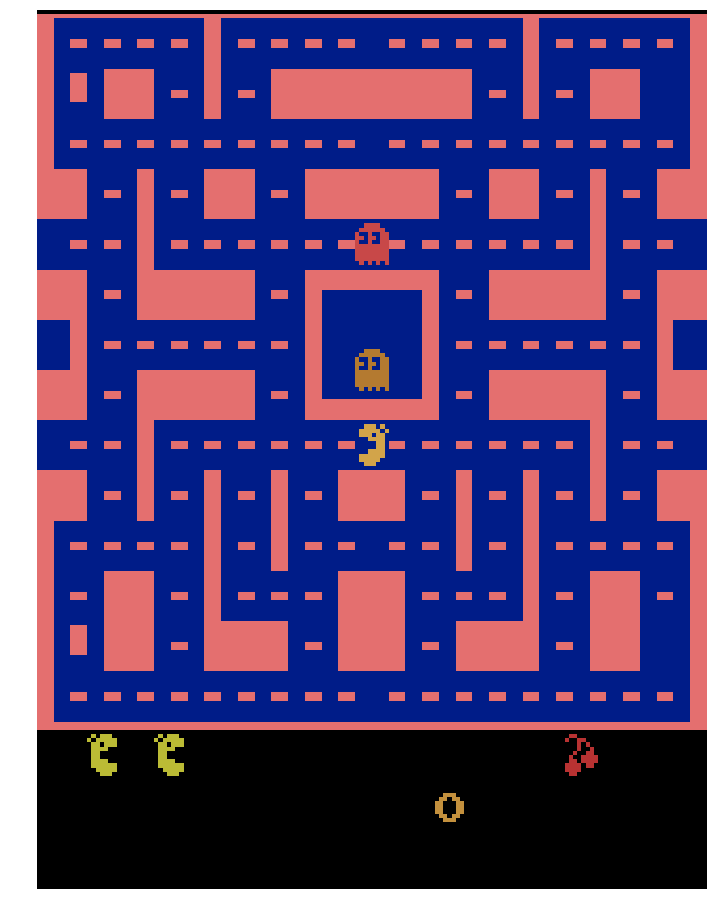

In [7]:
%matplotlib inline
plt.figure(figsize=(12,24))
plt.imshow(img)
plt.axis("off")
#save_fig("MsPacman")
plt.show()

In [8]:
(img == obs).all()

True

In [0]:
def plot_environment(env,figsize=(12,24)):
  plt.close()
  plt.figure(figsize=figsize)
  img = env.render(mode="rgb_array")
  plt.imshow(img)
  plt.axis("off")
  plt.show()

In [10]:
env.action_space

Discrete(9)

Discrete(9) means that the possible actions are integers 0 through 8, which represents the 9 possible positions of the joystick (0=center, 1=up, 2=right, 3=left, 4=down, 5=upper-right, 6=upper-left, 7=lower-right, 8=lower-left).

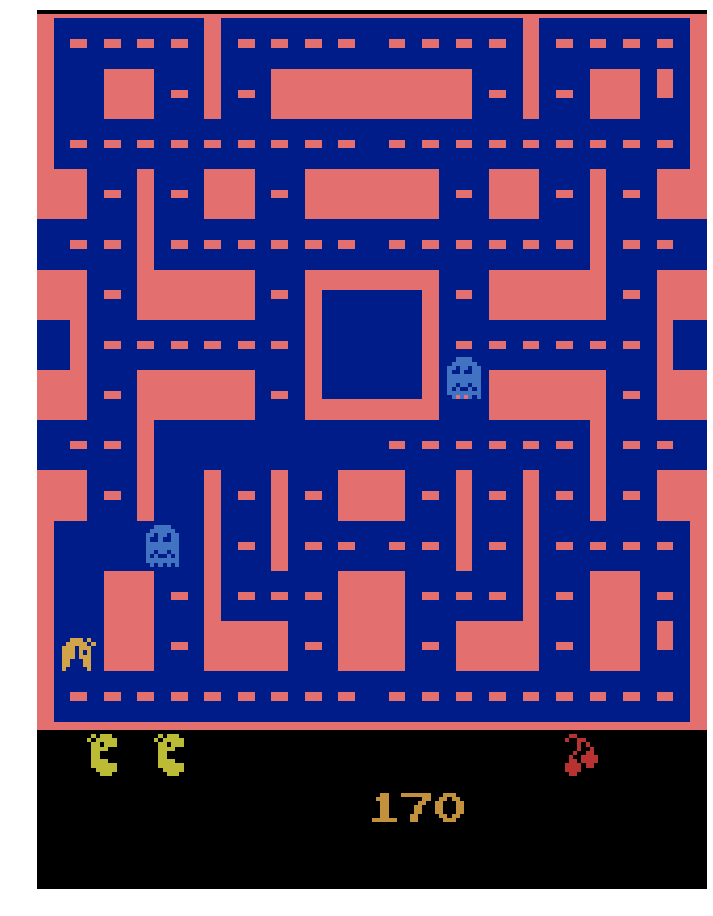

In [11]:
env.reset()
for step in range(110):
    env.step(3) #left
for step in range(40):
    env.step(8) #lower-left

plot_environment(env)

In [0]:
env.reset()
for step in range(110):
  env.step(3) #go left
  
for step in range(40):
  env.step(2) #go right
  

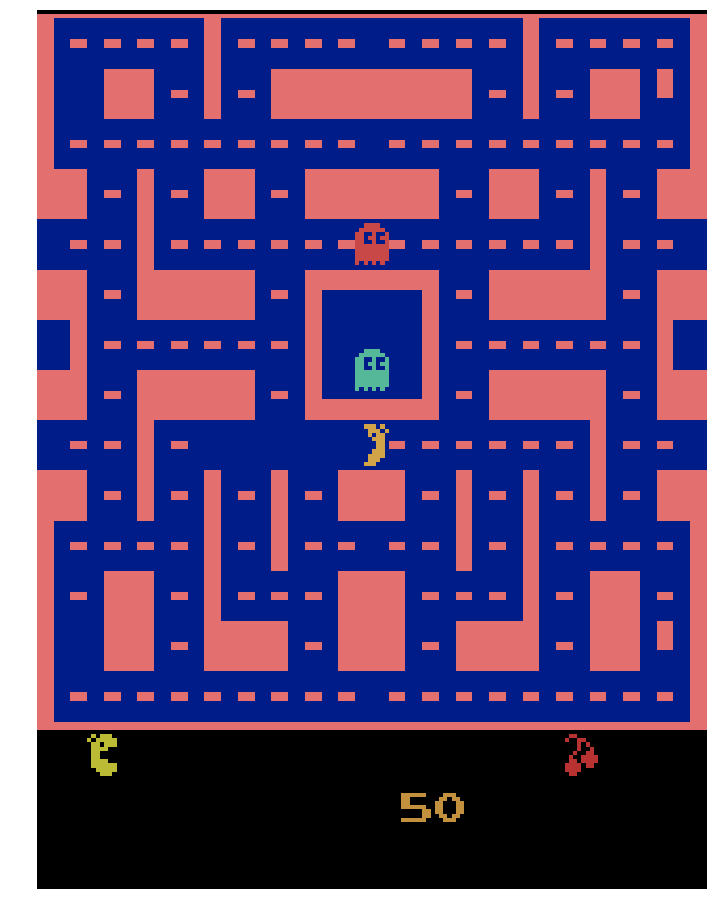

In [13]:
plot_environment(env)

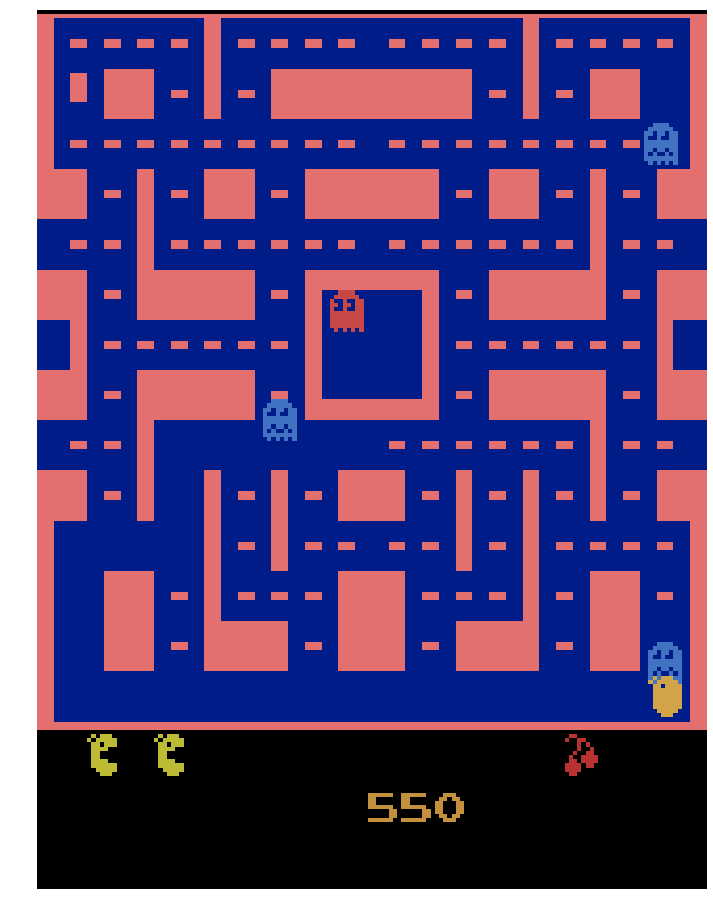

In [14]:
env.reset()
for step in range(110):
    env.step(3) #left
for step in range(50):
    env.step(8) #lower-left
for step in range(100):
    env.step(2) #right

plot_environment(env)

In [0]:
obs, reward, done, info = env.step(0)

In [16]:
obs.shape

(210, 160, 3)

In [17]:
reward

0.0

In [18]:
done

False

In [19]:
info

{'ale.lives': 3}

In [0]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode="rgb_array")
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample() # play randomly
        obs, reward, done, info = env.step(action)
    if done:
        break
    

In [0]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames), repeat=repeat, interval=interval)

In [22]:
%matplotlib inline
%matplotlib notebook
video = plot_animation(frames)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [23]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

for i in range(len(frames)):
  animate(i)
  clear_output(wait=True)
  display(i)

  plt.show()

NameError: ignored

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button

n0 = 100
n1 = 1000

#Create figure object
fig, ax = plt.subplots(1,1)
plt.subplots_adjust(bottom=0.3)

#Create Sliders for parameters
axcolor = "skyblue"
axlam = plt.axes([0.20, 0.05, 0.20, 0.03], facecolor=axcolor)

slam = Slider(axlam, 'Exp lambda', 0, 5, valinit=1)

#Default distributions
dexp = [np.random.exponential(1, n1)]

##Updates distributions when sliders are changed
def updateDist(val):
    lam = slam.val
    dexp[0] = np.random.exponential(lam, n1)

slam.on_changed(updateDist)

#updates plot on FuncAnimation call
def update(curr):
    if( curr == (n1-n0) ):
        a.event.source.stop()
    ax.clear()
    bins_exp = np.arange(0,4/slam.val,0.25)
    ax.hist(dexp[0][:(n0+curr)],bins=bins_exp)
    ax.set_title('Exp n={}'.format(n0+curr))
    fig.canvas.draw_idle()

#Define Start button and function to start animation
goax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(goax, 'Start', color=axcolor, hovercolor='0.975')    

a = [0]
def start(event):
    a[0] = animation.FuncAnimation(fig,update,interval=100)
button.on_clicked(start)

plt.show()

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import display, clear_output

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot([0,2*np.pi],[-1,1])

animate = lambda i: l.set_data(t[:i], x[:i])

for i in range(len(x)):
  animate(i)
  clear_output(wait=True)
  display(fig)

  plt.show()

In [0]:
env.close()

In [0]:
env = gym.make("CartPole-v0")

In [0]:
obs = env.reset()

In [0]:
obs

The observation is a 1D NumPy array composed of 4 floats: they represent the cart's horizontal position, its velocity, the angle of the pole (0 = vertical), and the angular velocity. Let's render the environment... unfortunately we need to fix an annoying rendering issue first.

In [0]:
#%matplotlib inline
#%matplotlib notebook
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [29]:
plot_cart_pole(env, obs)

ValueError: ignored

In [0]:
env.action_space

Yep, just two possible actions: accelerate towards the left or towards the right. Let's push the cart left until the pole falls:

In [0]:
obs = env.reset()
while True:
  obs, reward, done, info = env.step(0)
  plot_cart_pole(env,obs)
  if done:
    break

In [0]:
plt.close()
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis("off")
#save_fig("cart_pole_plot")

In [0]:
img.shape

In [0]:
obs = env.reset()
while True:
  obs, reward, done, info = env.step(1)
  plot_cart_pole(env,obs)
  if done:
    break

#plot_cart_pole(env,obs)

**Various policies**

A simple hard-coded policy

In [0]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)

    # hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1

    obs, reward, done, info = env.step(action)
    plot_cart_pole(env,obs)
    if done:
        break

In [0]:
video = plot_animation(frames)
plt.show()

**Neural Network Policies**

In [26]:
import tensorflow as tf

# 1. Specify the network architecture
n_inputs = 4  # == env.observation_space.shape[0]
n_hidden = 4  # it's a simple task, we don't need more than this
n_outputs = 1 # only outputs the probability of accelerating left
initializer = tf.variance_scaling_initializer()

# 2. Build the neural network
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=tf.nn.elu,
                         kernel_initializer=initializer)
outputs = tf.layers.dense(hidden, n_outputs, activation=tf.nn.sigmoid,
                          kernel_initializer=initializer)

# 3. Select a random action based on the estimated probabilities
p_left_and_right = tf.concat(axis=1, values=[outputs, 1 - outputs])
action = tf.multinomial(tf.log(p_left_and_right), num_samples=1)

init = tf.global_variables_initializer()

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use `tf.random.categorical` instead.


In [31]:
n_max_steps = 1000
frames = []

with tf.Session() as sess:
    init.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break

env.close()

ValueError: ignored

In [24]:
video = plot_animation(frames)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/matplotlib/animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [0]:
def movie(self):
        # New figure with white background
        fig = plt.figure(figsize=(6,6), facecolor='white')
        # New axis over the whole figure, no frame and a 1:1 aspect ratio
        ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
        line, = ax.plot([], [], lw=2)
        def init():  
            line.set_data([], [])  
            return line,
        def animate(i):
            x = self.X
            y = self.Y[i]
            line.set_data(list(x), list(y))	  
            return line,
        anim1=animation.FuncAnimation(fig, animate, init_func=init, frames=3000, interval=30)
        plt.show()
        return 0 